In [25]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import joblib

In [2]:
# Loading dataset
dataset = pd.read_csv("C:/Users/Admin/Downloads/creditcard.csv")

In [3]:
# First 5 rows of dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Last 5 rows
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking missing values
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Distributions of legit transactions and fraud transactions
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This dataset is highly unbalanced

0 represents "Normal Transaction"

1 represents "Fraud Trannsaction"

In [8]:
# Seperating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]

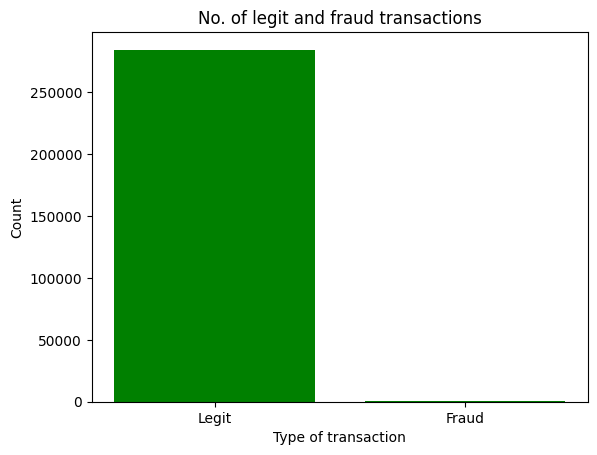

In [9]:
transaction = ["Legit", "Fraud"]
count = [legit.shape[0], fraud.shape[0]]
plt.bar(transaction, count, color = 'Green')
plt.xlabel("Type of transaction")
plt.ylabel("Count")
plt.title("No. of legit and fraud transactions")
plt.show()

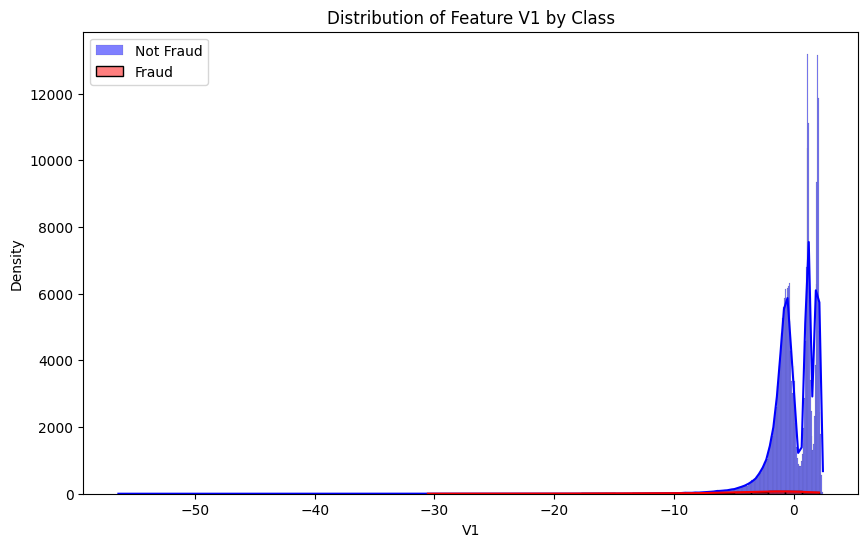

In [9]:
# 1. Feature Distribution

# Checking the distribution of feature V1 by class
plt.figure(figsize=(10, 6))
sns.histplot(dataset[dataset['Class'] == 0]['V1'], color='blue', kde=True, label='Legit')
sns.histplot(dataset[dataset['Class'] == 1]['V1'], color='red', kde=True, label='Fraud')
plt.title('Distribution of Feature V1 by Class')
plt.xlabel('V1')
plt.ylabel('Density')
plt.legend()
plt.show()

Purpose: This plot compares the distribution of a feature (e.g., V1) for both classes (fraud vs. non-fraud).

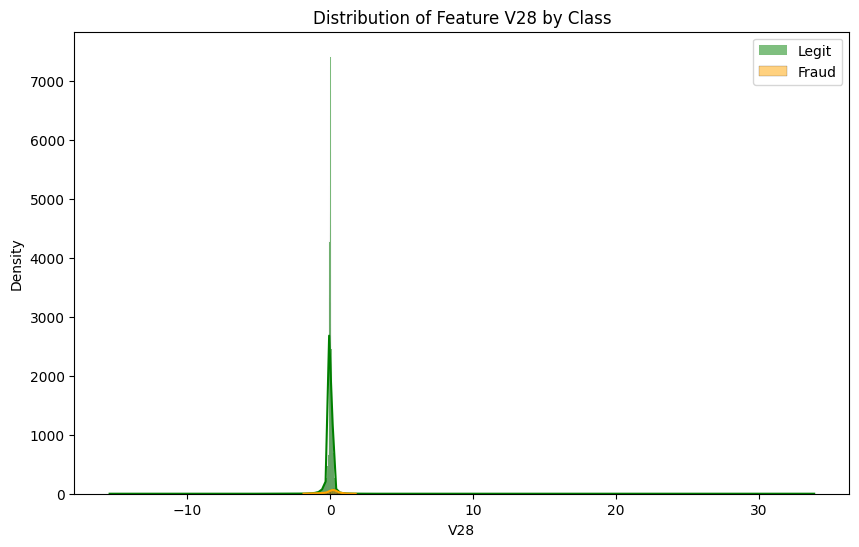

In [10]:
# Feature Distribution

# Checking the distribution of feature V28 by class
plt.figure(figsize=(10, 6))
sns.histplot(dataset[dataset['Class'] == 0]['V28'], color='green', kde=True, label='Legit')
sns.histplot(dataset[dataset['Class'] == 1]['V28'], color='Orange', kde=True, label='Fraud')
plt.title('Distribution of Feature V28 by Class')
plt.xlabel('V28')
plt.ylabel('Density')
plt.legend()
plt.show()

Purpose: This plot compares the distribution of a feature (e.g., V28) for both classes (fraud vs. non-fraud).

Insights: Since the feature distributions for fraud and non-fraud overlap significantly, it suggests that the feature may not be very discriminative on its own. This is Overlapping Distributions.

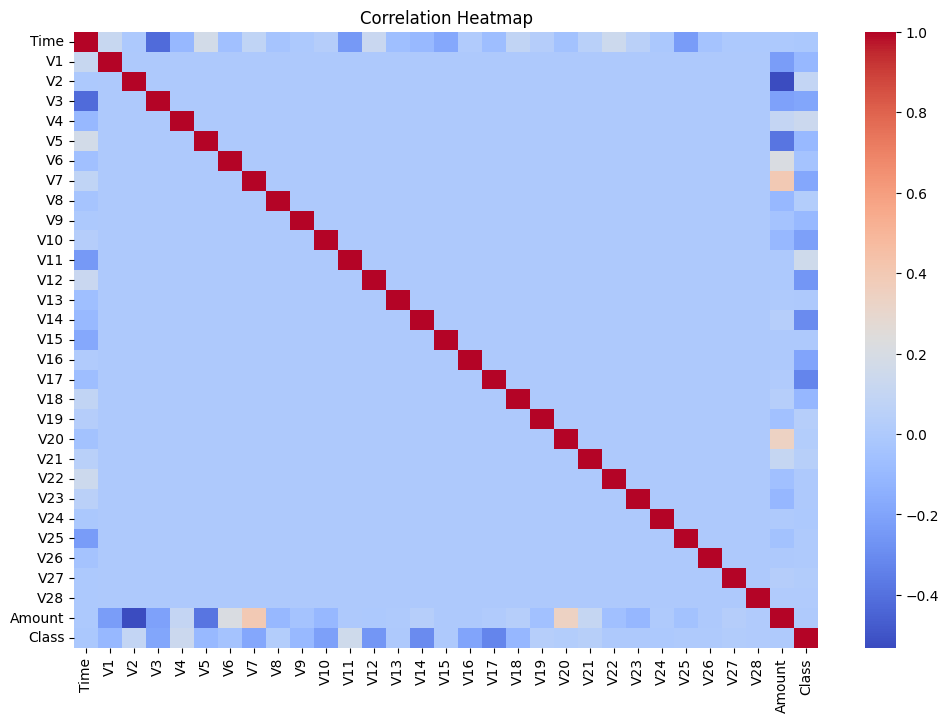

In [11]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Purpose: This heatmap shows the pairwise correlation between different features in the dataset.

Insights: 

In [12]:
# Statistical measures of data
print("Legit Amount description \n", legit.Amount.describe())
print("Fraud Amount description \n", fraud.Amount.describe())

Legit Amount description 
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
Fraud Amount description 
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Insights: The mean transaction in fraud is 122.25 while it is 88.29 in case of legit transactions.

In [13]:
# Compare the value for both transactions
dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


We can see a wide difference between means of legit and fraudulent transactions.

This difference is very important for us and this is how our machine learning algorithm can predict whether the transaction is either legit or fraud one.

Now, dealing with unbalanced data with the process of under-sampling.

Build a similar dataset containing similar number of legit and fraudulent transactions. Here we have:

* Legit = 284315
* Fraud = 492

So, taking legit sample also of 492 size.

In [14]:
legit_sample = legit.sample(n=492)

In [15]:
# Concatenate two dataframes
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51293,44878.0,-0.376917,0.968104,0.613634,0.729405,-0.000417,0.204667,0.376944,0.381080,-0.488601,...,0.173698,0.482804,-0.080351,-0.340967,-0.282472,-0.330463,-0.325895,-0.273178,37.30,0
211993,138666.0,-0.834195,0.556878,1.713737,-1.321361,0.359015,-0.615527,0.861314,-0.076989,-0.403969,...,-0.465150,-1.472517,0.087637,1.172661,0.029732,0.731553,-0.093017,0.061441,37.62,0
259517,159150.0,-1.198822,1.606366,-1.083671,-0.531017,-0.805512,0.346340,-0.520315,-1.981455,-0.582186,...,-1.138191,0.792569,0.376706,-0.303321,-1.165239,-0.241430,-0.077313,0.116649,128.30,0
226726,144776.0,-0.403015,0.966009,0.458992,-0.304954,0.528547,-0.916862,1.005301,-0.052442,-0.543080,...,0.232287,0.579200,-0.531014,-0.022039,1.001876,0.087211,-0.073635,-0.053489,28.96,0
224761,143954.0,0.138781,0.481449,-0.176080,-0.631328,0.571871,-0.506258,1.254931,-0.171025,-0.154258,...,-0.026254,-0.063067,0.251098,-0.355391,-0.784888,-0.726029,0.123046,0.121269,82.22,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

Insights: Now, we have equal number of both fraud and true transactions.

In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96552.819106,-0.013306,-0.136700,-0.045217,-0.051889,-0.047584,-0.062078,0.027641,-0.019195,-0.047486,...,0.055374,0.075911,-0.020589,0.008044,-0.013041,-0.019159,-0.015215,-0.024085,-0.004915,117.173902
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Since, we have equal number of fraud and legit transactions, so we can split the data into features and targets.

In [20]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

print("X \n", X)
print("Y \n", Y)

X 
             Time        V1        V2        V3        V4        V5        V6  \
51293    44878.0 -0.376917  0.968104  0.613634  0.729405 -0.000417  0.204667   
211993  138666.0 -0.834195  0.556878  1.713737 -1.321361  0.359015 -0.615527   
259517  159150.0 -1.198822  1.606366 -1.083671 -0.531017 -0.805512  0.346340   
226726  144776.0 -0.403015  0.966009  0.458992 -0.304954  0.528547 -0.916862   
224761  143954.0  0.138781  0.481449 -0.176080 -0.631328  0.571871 -0.506258   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V

In [21]:
# Split the data into training and testing data.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size = 0.2,
    stratify = Y,
    random_state = 2
)

# test_size = 0.2 represents 80% of the data is used for trainig and 20% is used for testing data.
# stratify = Y means stratifying the data based on Y.
# What it means is --> if I don't mention this term, then distribution of 0 and 1 can be very different in training and testing data.
# But when I mention this stratify = Y, then there will be evenly distribution of two classes in both X_training and X_test.

In [22]:
# random_state = 2 means how I want to split the data.
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Insights: There are about 984 values in original dataset. Out of this, 787 went in training data and 197 went in testing data.

So, we have successfully splitted the data into training and testing data.

In [23]:
# Model Training using Logistic Regression
model = LogisticRegression()

In [24]:
# Training the Logistic Regression model with training data
model.fit(X_train, Y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Model evaluation

# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data :', training_data_accuracy)

# Accuracy on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Testing data :', testing_data_accuracy)

# Classification Report
print("Classification report :", classification_report(X_test_prediction, Y_test))

# Probability
Y_prob_fraud = model.predict_proba(X_test)[:, 1]
print("Probability of the fraud class:", Y_prob_fraud)


Accuracy on Training data : 0.9351969504447268
Accuracy on Testing data : 0.9238578680203046
Classification report :               precision    recall  f1-score   support

           0       0.97      0.89      0.93       108
           1       0.88      0.97      0.92        89

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

Probability of the fraud class: [0.99990498 0.02234905 0.05998883 0.0956343  1.         0.01254679
 0.9999533  1.         0.11210725 1.         0.01189913 1.
 1.         0.24336388 0.05845053 0.9999799  0.08950128 0.81266983
 0.6614071  0.13934242 0.16278157 0.0059022  0.20262635 0.99999987
 0.02361785 0.99999963 1.         0.29142972 0.99999708 0.61152381
 0.25930458 0.99999995 0.57903604 0.99998823 1.         0.27105821
 0.28898955 0.40064823 0.04036759 0.99999159 0.99989799 0.09326023
 0.08465469 1.         0.99993873 1.         1.         0.99999

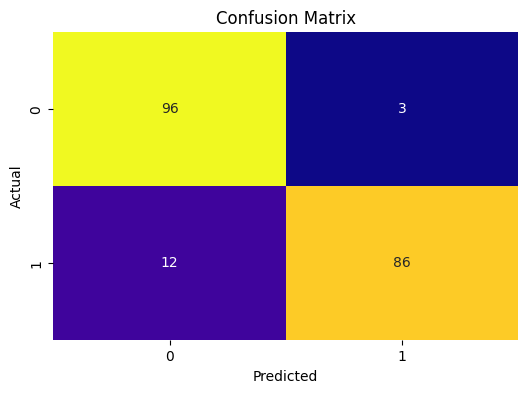

In [39]:
# 3. Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

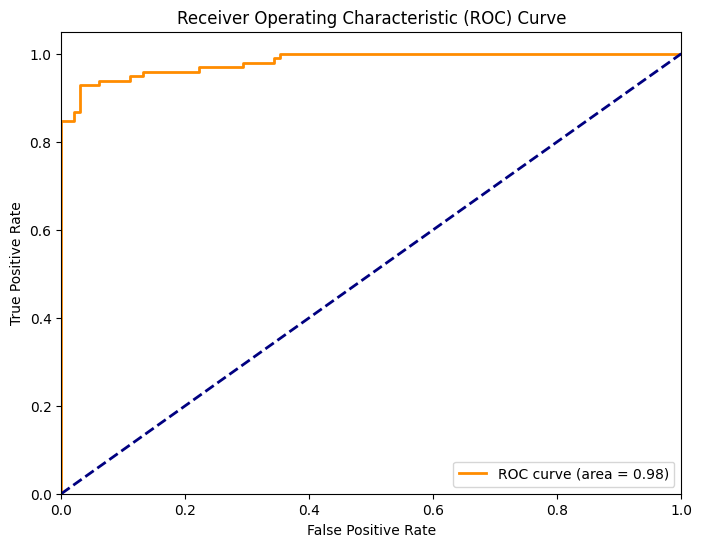

In [40]:
# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_fraud)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Save the model
joblib.dump(model, 'credit_card_model.pkl')

['credit_card_model.pkl']